Random Forest Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sklearn
import openpyxl
from sklearn.preprocessing import LabelEncoder
import re

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_percentage_error

# Creating a dataframe before splitting

In [3]:
df = pd.read_excel("D:\\LTFS\\PC_Train.xlsx")
#PC_Train_df = pd.DataFrame(PC_Train)
#df = PC_Train_df
df = pd.DataFrame(df)

In [4]:
df_bkup = df
df

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Total Income
0,1000336362172130,MADHYAPRADESH,CENTRAL,M,SATNA,485001,SATNA,Hardi,M,"24.5784892,80.8490928",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,71.97,19.84,0.90,12.00,16.71,Poor,0.24,0.00,1030000
1,1000733095118720,MADHYAPRADESH,CENTRAL,M,DEPALPUR,453115,INDORE,Palasiya,M,NaN,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,93.62,24.84,0.94,23.57,35.46,Poor,0.33,0.00,800000
2,1001421387207060,HARYANA,NORTH,M,PANIPAT,132103,PANIPAT,Panipat,M,NaN,...,NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDI...,44.44,4.53,0.68,32.17,49.40,Average,0.86,8.22,1530000
3,1001464739070260,MADHYAPRADESH,CENTRAL,M,ISAGARH,473335,ASHOKNAGAR,Futera,M,"24.5904367,77.7141512",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,94.74,17.99,0.93,26.28,39.85,Poor,1.63,0.00,800000
4,1001466701508820,ODISHA,EAST,M,UMARKOTE,764072,NABARANGAPUR,Junapani,M,NaN,...,EASTERN PLATEAU (CHHOTANAGPUR) AND EASTERN GHA...,92.69,39.75,0.92,15.51,22.39,Poor,0.16,0.00,680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301,9998984545791300,KARNATAKA,SOUTH,M,HOSAPETE,583222,BELLARY,Gollarahalli,M,"15.3520386,76.5307586",...,EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,83.53,30.86,0.93,31.59,48.46,Average,0.03,18.74,2000000
53302,9999314932431200,BIHAR,EAST,M,KISHANGANJ,855107,KISHANGANJ,Parasi,S,"26.2038111,88.010923",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,71.08,18.56,0.93,24.01,36.18,Poor,0.08,8.31,1275000
53303,9999402063960190,WEST BENGAL,EAST,M,GOGHAT I,712614,HUGLI,Ratanpur,M,"22.8825673,87.7569314",...,EASTERN COASTAL PLAIN HOT SUBHUMID TO SEMI-AR...,71.93,30.02,0.94,24.67,37.23,Average,0.07,0.00,1053000
53304,9999491029422810,MADHYAPRADESH,CENTRAL,M,JOURA,476221,MORENA,Mundrawaja,S,NaN,...,NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDI...,54.90,11.75,0.92,29.02,44.29,Average,0.33,0.00,580500


# Separating dependent and independent variables

In [5]:
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]

# Splitting the PC Train data into Train and test with in itself

In [6]:
df = pd.DataFrame(X_train)
df_lbl = pd.DataFrame(y_train)
df

,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,Address type,...,Rabi Seasons Type of water bodies in hectares 2020,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm)
0,MADHYAPRADESH,CENTRAL,M,SATNA,485001,SATNA,Hardi,M,"24.5784892,80.8490928",Permanent Address,...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,71.97,19.84,0.90,12.00,16.71,Poor,0.24,0.00
1,MADHYAPRADESH,CENTRAL,M,DEPALPUR,453115,INDORE,Palasiya,M,NaN,NaN,...,[None],CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,93.62,24.84,0.94,23.57,35.46,Poor,0.33,0.00
2,HARYANA,NORTH,M,PANIPAT,132103,PANIPAT,Panipat,M,NaN,NaN,...,['water'],NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDI...,44.44,4.53,0.68,32.17,49.40,Average,0.86,8.22
3,MADHYAPRADESH,CENTRAL,M,ISAGARH,473335,ASHOKNAGAR,Futera,M,"24.5904367,77.7141512",Permanent Address,...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,94.74,17.99,0.93,26.28,39.85,Poor,1.63,0.00
4,ODISHA,EAST,M,UMARKOTE,764072,NABARANGAPUR,Junapani,M,NaN,NaN,...,[None],EASTERN PLATEAU (CHHOTANAGPUR) AND EASTERN GHA...,92.69,39.75,0.92,15.51,22.39,Poor,0.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301,KARNATAKA,SOUTH,M,HOSAPETE,583222,BELLARY,Gollarahalli,M,"15.3520386,76.5307586",Permanent Address,...,"['river, wetland']",EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,83.53,30.86,0.93,31.59,48.46,Average,0.03,18.74
53302,BIHAR,EAST,M,KISHANGANJ,855107,KISHANGANJ,Parasi,S,"26.2038111,88.010923",Permanent Address,...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,71.08,18.56,0.93,24.01,36.18,Poor,0.08,8.31
53303,WEST BENGAL,EAST,M,GOGHAT I,712614,HUGLI,Ratanpur,M,"22.8825673,87.7569314",Permanent Address,...,[None],EASTERN COASTAL PLAIN HOT SUBHUMID TO SEMI-AR...,71.93,30.02,0.94,24.67,37.23,Average,0.07,0.00
53304,MADHYAPRADESH,CENTRAL,M,JOURA,476221,MORENA,Mundrawaja,S,NaN,NaN,...,[None],NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDI...,54.90,11.75,0.92,29.02,44.29,Average,0.33,0.00


# finding categorical variables

In [7]:
def identify_text_only_categorical(dataframe):
   
    text_only_columns = []
    
    for column in dataframe.columns:
        # Skip columns that aren't object type (strings)
        if dataframe[column].dtype != 'object':
            continue
        
        # Check if all non-null values in the column are text-only
        is_text_only = True
        
        # Get non-null values
        non_null_values = dataframe[column].dropna()
        
        if len(non_null_values) == 0:
            # Skip empty columns
            continue
        
        # Check each value in the column
        for value in non_null_values:
            # Convert to string if not already
            value_str = str(value).strip()
            
            # Skip empty strings
            if not value_str:
                continue
                
            # Check if the value contains any digits
            if re.search(r'\d', value_str):
                is_text_only = False
                break
            
            # Also ensure it's not just special characters
            if not re.search(r'[a-zA-Z]', value_str):
                is_text_only = False
                break
        
        if is_text_only:
            text_only_columns.append(column)
    
    return text_only_columns

In [8]:
import pandas as pd
import re

text_only_cols = identify_text_only_categorical(df)
print(text_only_cols)
len(text_only_cols)

['State', 'REGION', 'SEX', 'DISTRICT', 'MARITAL_STATUS', 'Address type', 'Ownership', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Nearest Mandi Name', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'Kharif Seasons  Type of soil in 2022', 'Kharif Seasons  Type of water bodies in hectares 2022', 'Kharif Seasons  Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2022', 'Rabi Seasons Type of water bodies in hectares 2022', 'Rabi Seasons Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2021', 'Rabi Seasons Type of water bodies in hectares 2021', 'Rabi Seasons Agro Ecological Sub Zone in 2021', 'Kharif Seasons Type of soil in 2021', 'Kharif Seasons Type of water bodies in hectares 2021', 'Kharif Seasons Agro Ecological Sub Zone in 2021', 'Kharif Seasons Type of soil in 2020', 'Kharif Seasons Type of water bodies in hectare

30

# label encoding 

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in df[text_only_cols].columns:
    df[f"{column}_encoded"] = le.fit_transform(df[column])

print("\nDataFrame with encoded values:")
print(df)

# If you need to keep track of the mappings
print("\nLabel mappings:")
for column in df[text_only_cols]:
    unique_values = df[column].unique()
    encoded_values = le.fit_transform(unique_values)
    
    mapping = dict(zip(unique_values, encoded_values))
    print(f"{column} mapping: {mapping}")


DataFrame with encoded values:
               State   REGION SEX           CITY  Zipcode      DISTRICT  \
0      MADHYAPRADESH  CENTRAL   M          SATNA   485001         SATNA   
1      MADHYAPRADESH  CENTRAL   M       DEPALPUR   453115        INDORE   
2            HARYANA    NORTH   M        PANIPAT   132103       PANIPAT   
3      MADHYAPRADESH  CENTRAL   M        ISAGARH   473335    ASHOKNAGAR   
4             ODISHA     EAST   M       UMARKOTE   764072  NABARANGAPUR   
...              ...      ...  ..            ...      ...           ...   
53301      KARNATAKA    SOUTH   M       HOSAPETE   583222       BELLARY   
53302          BIHAR     EAST   M     KISHANGANJ   855107    KISHANGANJ   
53303    WEST BENGAL     EAST   M       GOGHAT I   712614         HUGLI   
53304  MADHYAPRADESH  CENTRAL   M          JOURA   476221        MORENA   
53305      TELANGANA    SOUTH   M  THUNGATHURTHI   508222      SURYAPET   

            VILLAGE MARITAL_STATUS               Location       Add

In [10]:
#df.to_csv('D:\\LTFS\\df_encoded.csv')
len(df.columns)

138

# removing the text columns from data frame to run imputation

In [11]:
df1 = df.drop(text_only_cols, axis = 1)
df1
len(df1.columns)

108

In [12]:
#df1.to_csv("D:\\LTFS\\df_encoded.csv")
df2 = df1.drop( ['CITY','Zipcode', 'VILLAGE', 'Location'],axis =1)
df2
len(df2.columns)

104

In [27]:
df2.to_csv("D:\\LTFS\\df_encoded.csv")
len(df2.columns)

104

# USING knn imputer for missing values

In [14]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df2), columns= df2.columns)

In [28]:
#df_imputed.to_csv("D:\\LTFS\\pc_train_imputed.csv")
df = df_imputed

In [29]:
len(df.columns)

104

In [30]:
df

,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,K022-Proximity to nearest mandi (Km),K022-Proximity to nearest railway (Km),KO22-Village score based on socio-economic parameters (0 to 100),K022-Seasonal Average Rainfall (mm),K022-Ambient temperature (min),K022-Ambient temperature (max),...,Kharif Seasons Type of soil in 2021_encoded,Kharif Seasons Type of water bodies in hectares 2021_encoded,Kharif Seasons Agro Ecological Sub Zone in 2021_encoded,Kharif Seasons Type of soil in 2020_encoded,Kharif Seasons Type of water bodies in hectares 2020_encoded,Kharif Seasons Agro Ecological Sub Zone in 2020_encoded,Rabi Seasons Type of soil in 2020_encoded,Rabi Seasons Type of water bodies in hectares 2020_encoded,Rabi Seasons Agro Ecological Sub Zone in 2020_encoded,"Village category based on socio-economic parameters (Good, Average, Poor)_encoded"
0,2.0,1.745000e+06,527000.0,10.0,33.6,22.9,16.711855,1365.95,24.28,31.36,...,4.0,21.0,1.0,4.0,21.0,1.0,4.0,21.0,1.0,2.0
1,6.0,1.337463e+05,0.0,8.0,12.6,4.9,35.462852,1519.77,22.91,30.61,...,2.0,21.0,0.0,2.0,21.0,0.0,2.0,21.0,0.0,2.0
2,2.0,4.900000e+04,0.0,15.0,0.0,0.0,49.395581,763.86,24.11,32.22,...,0.0,18.0,9.0,0.0,18.0,9.0,0.0,18.0,9.0,0.0
3,1.0,7.708900e+04,150000.0,10.0,7.8,7.1,39.852249,1464.82,23.52,30.75,...,2.0,21.0,1.0,2.0,21.0,1.0,2.0,21.0,1.0,2.0
4,3.0,5.103267e+04,400000.0,8.0,26.8,16.5,22.385350,1341.12,22.29,28.55,...,5.0,21.0,6.0,5.0,21.0,6.0,5.0,21.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301,0.0,6.290667e+05,0.0,15.0,1.0,29.1,48.458923,877.87,21.01,26.96,...,6.0,14.0,5.0,6.0,21.0,5.0,6.0,14.0,5.0,0.0
53302,1.0,7.211200e+04,380000.0,5.0,12.5,44.4,36.175865,1122.45,24.45,31.73,...,4.0,21.0,1.0,4.0,21.0,1.0,4.0,21.0,1.0,2.0
53303,0.0,2.812731e+05,300000.0,4.0,10.3,0.0,37.234532,1387.03,26.07,31.03,...,1.0,21.0,4.0,2.0,21.0,1.0,1.0,21.0,4.0,0.0
53304,0.0,2.530152e+05,144000.0,5.0,3.5,3.1,44.289822,1123.27,24.95,32.39,...,4.0,21.0,9.0,4.0,21.0,9.0,4.0,21.0,9.0,0.0


# Running PCA

In [31]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler


'''
df = pandas.DataFrame(data=numpy.random.normal(0, 1, (53306, 106)))

# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)
'''

scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

pca = PCA(0.95)
pca.fit(df)
df = pca.transform(df)

'''
# Reformat and view results
loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df.columns))],
index=df.columns)

print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()
'''
df

array([[ 3.59216384, -0.43282276, -3.83651387, ...,  0.20385271,
        -0.36907031,  0.11462512],
       [ 3.14092124, -7.17186805,  0.55512179, ..., -0.58694531,
         0.3586096 , -0.41977493],
       [12.80823669,  7.43416973,  1.18555879, ..., -0.27578236,
        -0.22469174, -0.04132275],
       ...,
       [ 0.2520284 ,  1.99598312, -1.91181242, ..., -0.97403879,
         1.27859598, -1.55738916],
       [ 8.57865508,  1.43095125,  6.47649839, ...,  0.32110755,
        -0.49719688,  0.01286022],
       [-0.3055802 ,  0.57445162, -1.47752582, ...,  0.28547729,
         0.02667148, -0.46452438]], shape=(53306, 45))

In [32]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,3.592164,-0.432823,-3.836514,-1.799925,1.728441,5.163727,2.193445,-0.858141,1.262142,1.266729,...,0.302477,-0.786078,-0.407190,-0.280199,0.070122,0.162556,-0.038139,0.203853,-0.369070,0.114625
1,3.140921,-7.171868,0.555122,-0.242958,0.467136,0.386084,0.119104,-1.511630,1.393417,-0.548678,...,-0.391501,-0.896605,-0.201586,0.216623,-0.340496,-0.815134,-0.462212,-0.586945,0.358610,-0.419775
2,12.808237,7.434170,1.185559,-2.124589,-2.217168,-2.596941,-0.955126,0.354992,-1.761479,0.589381,...,-0.363351,0.927658,-1.396625,-1.457312,1.241765,-1.143069,-0.192489,-0.275782,-0.224692,-0.041323
3,4.642329,-5.838762,0.390958,-1.081230,-0.236064,0.356909,-0.492147,-1.129770,-0.818569,-0.878569,...,-0.557518,0.099643,0.514779,-0.214476,-0.746182,0.239139,0.002610,-1.102220,-0.606967,-0.711941
4,-3.667033,1.455128,-1.103336,-5.427988,2.656975,1.407556,1.649095,3.731846,1.869333,-1.713148,...,-0.891869,-0.210898,-1.697780,-0.087129,-1.225991,-1.220145,0.301894,0.348402,0.347395,1.351221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301,-4.774207,1.667536,1.818858,-2.128566,-1.243700,-4.048810,-0.947844,-0.351846,0.640686,1.159714,...,-0.415853,1.033977,-0.485323,0.724132,0.509183,0.371432,0.271149,0.937810,0.289665,-0.548294
53302,2.771037,0.035093,-1.525127,-0.486707,1.857133,2.078680,0.144952,-0.196561,1.612120,0.942248,...,0.113585,-0.608520,0.964576,0.709908,1.212941,-1.295386,-0.493339,-0.323562,0.165275,0.207591
53303,0.252028,1.995983,-1.911812,0.035960,2.390404,-2.582357,-0.795726,5.798086,3.316063,-2.834858,...,2.185866,-1.739500,-0.656534,1.103762,-0.726186,-0.387279,0.654926,-0.974039,1.278596,-1.557389
53304,8.578655,1.430951,6.476498,-1.450339,0.504745,-1.054299,2.868701,-0.352732,0.669568,1.401950,...,-0.453103,-1.067715,0.064820,-0.079074,-1.151027,0.025989,0.616523,0.321108,-0.497197,0.012860


# Capturing the PC loadings

In [20]:
pca.components_

array([[ 0.00144748,  0.00314791,  0.0047853 , ...,  0.06520597,
         0.03864195, -0.04165103],
       [-0.02051402,  0.01061984,  0.00352015, ..., -0.04420068,
         0.19882899, -0.00316351],
       [-0.00099258,  0.01373709,  0.00213329, ..., -0.04706762,
         0.19369015,  0.0051861 ],
       ...,
       [-0.00817846,  0.00558277, -0.01020266, ...,  0.00233748,
         0.02602364, -0.04172177],
       [ 0.00900047, -0.00288457, -0.00030241, ...,  0.02038457,
        -0.01258301,  0.02893272],
       [-0.00065532,  0.00706761,  0.0030878 , ...,  0.03172447,
         0.01005449, -0.00715972]], shape=(45, 104))

In [21]:
df_loadings = pandas.DataFrame(pca.components_)
df_loadings

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.001447,0.003148,0.004785,0.003653,-0.049435,-0.015760,0.055083,0.014454,0.146133,0.188680,...,-0.182615,0.065206,0.038642,-0.171666,0.066581,0.042045,-0.182615,0.065206,0.038642,-0.041651
1,-0.020514,0.010620,0.003520,-0.022305,-0.015031,-0.037559,0.036480,-0.127833,0.039321,0.022675,...,0.062131,-0.044201,0.198829,0.056126,-0.044949,0.176625,0.062131,-0.044201,0.198829,-0.003164
2,-0.000993,0.013737,0.002133,-0.003210,-0.081456,-0.075751,0.090204,-0.161739,-0.029979,-0.003081,...,0.077813,-0.047068,0.193690,0.075797,-0.047294,0.176683,0.077813,-0.047068,0.193690,0.005186
3,0.020092,0.006602,-0.003453,0.061090,-0.118428,-0.009027,0.125211,0.051054,0.195504,0.164862,...,-0.009132,-0.059190,-0.127688,-0.007341,-0.051450,-0.134163,-0.009132,-0.059190,-0.127688,-0.060784
4,0.011811,-0.004099,0.002484,-0.001531,0.103438,0.005015,-0.102751,-0.054460,0.041097,0.012571,...,-0.011793,0.360634,0.012034,-0.001136,0.290948,0.010944,-0.011793,0.360634,0.012034,0.103777
5,-0.010999,-0.009996,0.002555,-0.005550,0.354841,0.075186,-0.349395,-0.079560,0.024973,0.062513,...,0.017104,-0.122117,-0.029893,-0.005589,-0.103618,-0.030388,0.017104,-0.122117,-0.029893,0.321267
6,-0.051481,-0.009341,0.007363,-0.033140,0.038055,0.041318,-0.055027,0.183342,0.042111,0.033854,...,0.225425,0.060291,0.062565,0.213409,0.018200,0.059313,0.225425,0.060291,0.062565,0.019144
7,-0.017265,-0.006635,0.000663,-0.006135,0.041328,-0.018397,-0.058728,0.099918,0.259065,0.144938,...,-0.079637,-0.054757,0.017029,-0.059729,-0.062759,0.012579,-0.079637,-0.054757,0.017029,0.025560
8,0.011933,0.005014,0.002112,-0.065418,0.035814,0.014021,-0.042775,0.006062,0.009058,-0.050961,...,-0.081279,-0.094565,0.014594,-0.076221,-0.049138,0.012499,-0.081279,-0.094565,0.014594,-0.053237
9,0.056054,-0.000904,0.008602,-0.079973,0.014395,0.036654,-0.019533,-0.018598,-0.025990,-0.041416,...,0.154771,-0.031808,-0.106925,0.129640,0.008994,-0.104595,0.154771,-0.031808,-0.106925,-0.064294


# Scree plot

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# This function performs PCA and creates a scree plot
def pca_scree_plot(df, n_components=None):
    """
    Perform PCA on the dataframe and create a scree plot
    
    Parameters:
    -----------
    df : pandas DataFrame
        The data to perform PCA on
    n_components : int, optional
        Number of components to calculate. If None, all components will be calculated.
    
    Returns:
    --------
    pca : PCA object
        The fitted PCA object
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    
    # Determine number of components
    if n_components is None:
        n_components = min(df.shape)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)
    
    # Create a scree plot
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Plot the explained variance
    plt.figure(figsize=(10, 6))
    
    # Bar plot for individual explained variance
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, 
            alpha=0.7, label='Individual Explained Variance')
    
    # Line plot for cumulative explained variance
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             where='mid', label='Cumulative Explained Variance', color='red')
    
    plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.7, label='95% Explained Variance')
    plt.axhline(y=0.9, color='purple', linestyle='--', alpha=0.5, label='90% Explained Variance')
    
    # Add a title and labels
    plt.title('Scree Plot', fontsize=16)
    plt.xlabel('Principal Component', fontsize=12)
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    
    return pca
    plt.show()

PCA(n_components=45)

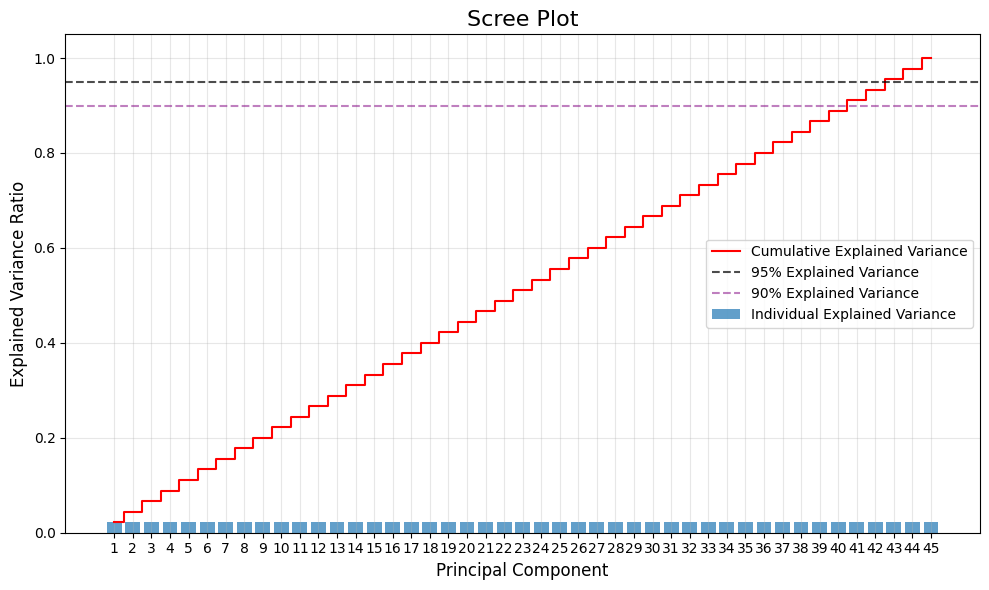

In [34]:
pca_scree_plot(df, n_components=45)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,3.592164,-0.432823,-3.836514,-1.799925,1.728441,5.163727,2.193445,-0.858141,1.262142,1.266729,...,0.302477,-0.786078,-0.407190,-0.280199,0.070122,0.162556,-0.038139,0.203853,-0.369070,0.114625
1,3.140921,-7.171868,0.555122,-0.242958,0.467136,0.386084,0.119104,-1.511630,1.393417,-0.548678,...,-0.391501,-0.896605,-0.201586,0.216623,-0.340496,-0.815134,-0.462212,-0.586945,0.358610,-0.419775
2,12.808237,7.434170,1.185559,-2.124589,-2.217168,-2.596941,-0.955126,0.354992,-1.761479,0.589381,...,-0.363351,0.927658,-1.396625,-1.457312,1.241765,-1.143069,-0.192489,-0.275782,-0.224692,-0.041323
3,4.642329,-5.838762,0.390958,-1.081230,-0.236064,0.356909,-0.492147,-1.129770,-0.818569,-0.878569,...,-0.557518,0.099643,0.514779,-0.214476,-0.746182,0.239139,0.002610,-1.102220,-0.606967,-0.711941
4,-3.667033,1.455128,-1.103336,-5.427988,2.656975,1.407556,1.649095,3.731846,1.869333,-1.713148,...,-0.891869,-0.210898,-1.697780,-0.087129,-1.225991,-1.220145,0.301894,0.348402,0.347395,1.351221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53301,-4.774207,1.667536,1.818858,-2.128566,-1.243700,-4.048810,-0.947844,-0.351846,0.640686,1.159714,...,-0.415853,1.033977,-0.485323,0.724132,0.509183,0.371432,0.271149,0.937810,0.289665,-0.548294
53302,2.771037,0.035093,-1.525127,-0.486707,1.857133,2.078680,0.144952,-0.196561,1.612120,0.942248,...,0.113585,-0.608520,0.964576,0.709908,1.212941,-1.295386,-0.493339,-0.323562,0.165275,0.207591
53303,0.252028,1.995983,-1.911812,0.035960,2.390404,-2.582357,-0.795726,5.798086,3.316063,-2.834858,...,2.185866,-1.739500,-0.656534,1.103762,-0.726186,-0.387279,0.654926,-0.974039,1.278596,-1.557389
53304,8.578655,1.430951,6.476498,-1.450339,0.504745,-1.054299,2.868701,-0.352732,0.669568,1.401950,...,-0.453103,-1.067715,0.064820,-0.079074,-1.151027,0.025989,0.616523,0.321108,-0.497197,0.012860


# Importing the model, Fitting and Predicting the test outputs for RF, XGBOOST, SVR Techniques, and Linear regression

In [36]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth = 30, min_samples_split= 500)
regressor.fit(df, df_lbl)

D:\Python\envs\notebook\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [37]:
# Training the xgboost Regression model on the whole dataset
import xgboost 
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, n_estimators = 100, random_state = 0, max_depth = 30)
xgbr.fit(df, df_lbl)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Training the Support Vector Regression (SVR) 
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(df, df_lbl)

In [ ]:
# Training the Linear Regression (LR) 
from sklearn.linear_model import LinearRegression 
regr = LinearRegression()
regr.fit(df, df_lbl)

In [ ]:
# Predicting with different models on the training dataset

In [38]:
# Predicting a new result
#y_pred = regressor.predict(df)
y_pred1 = xgbr.predict(df)
#y_pred2 = svr_rbf.predict(df)
#y_pred3 = regr.predict(df)


In [41]:
#y_pred = pd.DataFrame(y_pred)
y_pred1 = pd.DataFrame(y_pred1)
#y_pred2 = pd.DataFrame(y_pred2)
#y_pred3 = pd.DataFrame(y_pred3)

# y_pred, y_pred1, y_pred2, y_pred3 

In [ ]:
#y_pred= pd.to_numeric(y_pred)
df_concat = pd.concat([y_pred, df_lbl], axis=1)
print(df_concat)
df_concat.to_csv('D:\\LTFS\\predicted_actual.csv')

In [42]:
df_lbl


,Total Income
0,1030000
1,800000
2,1530000
3,800000
4,680000
...,...
53301,2000000
53302,1275000
53303,1053000
53304,580500


In [43]:
df_lbl =pd.DataFrame(df_lbl)
#condition = df_lbl['Total Income'] == 0
#df_lbl = df_lbl.where(df_lbl != 0, 1) # Replace 0 with 1
df_lbl


,Total Income
0,1030000
1,800000
2,1530000
3,800000
4,680000
...,...
53301,2000000
53302,1275000
53303,1053000
53304,580500


# MAPE Calculations - RF output

In [44]:
import pandas as pd
import numpy as np

def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
       
    ape = np.array(np.abs((actual - predicted) / np.abs(actual)))
    ape = pd.DataFrame(ape)
    ape = ape.replace([np.inf, -np.inf], 0)
    
    return np.mean(ape) 

# Calculate MAPE
# mape_value = mape(df_lbl, y_pred)

#print(f"MAPE: {mape_value*100:.2f}%")


# # MAPE Calculations - Xgboost output

In [45]:
mape_value = mape(df_lbl, y_pred1)

print(f"MAPE: {mape_value*100:.2f}%")

MAPE: 2.20%


C:\Users\HOME\AppData\Local\Temp\ipykernel_7880\1559103993.py:7: RuntimeWarning: divide by zero encountered in divide
  ape = np.array(np.abs((actual - predicted) / np.abs(actual)))


# MAPE Calculations - SVR output

In [ ]:
mape_value = mape(df_lbl, y_pred2)

print(f"MAPE: {mape_value*100:.2f}%")

# MAPE Calculations - Linear Regression output

In [ ]:
mape_value = mape(df_lbl, y_pred3)

print(f"MAPE: {mape_value*100:.2f}%")

# Predicting the Farmer income for the prediction dataset 

# Running the xboost model on the LTFS prediction data

In [69]:
df_prediction = pd.read_excel("D:\\LTFS\\PC_Prediction.xlsx")
#PC_Train_df = pd.DataFrame(PC_Train)
#df = PC_Train_df
df_prediction = pd.DataFrame(df_prediction)


In [70]:
df_prediction

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Type of water bodies in hectares 2020,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm)
0,576972022499073,KARNATAKA,SOUTH,M,TUMAKURU,572102,TUMKUR,Tumkur,M,"13.3173175,77.1240408",...,['water'],EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,92.35,23.34,0.97,34.633257,53.384919,Good,0.000118,8.85
1,979235081831136,HARYANA,NORTH,M,KALKA,133302,PANCHKULA,Kalka,M,"30.4749107,77.1320795",...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
2,176490610549774,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,NaN,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
3,977021407171384,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,S,NaN,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
4,1334154133262320,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,"30.7982131,76.9209035",...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,935545821159359,TELANGANA,SOUTH,M,MANCHERIAL,504208,MANCHERIAL,Mancherial,M,NaN,...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,71.85,23.66,0.89,27.145613,41.250114,Average,30.463177,0.00
9996,883027290071704,TELANGANA,SOUTH,M,TEEGALPAHAD,504303,MANCHERIAL,Mancherial,M,"19.0210779,79.6371575",...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,71.85,23.66,0.89,27.145613,41.250114,Average,30.463177,0.00
9997,445611949107371,MADHYA PRADESH,CENTRAL,M,NARWAR,473865,SHIVPURI,Datla,M,"25.6783041,78.0419912",...,[None],DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,75.76,19.12,0.89,22.996538,34.525942,Poor,35.600829,2.93
9998,731338063265357,ANDHRA PRADESH,SOUTH,M,PULLALACHERUVU,523328,PRAKASAM,Pullalacheruvu,M,NaN,...,[None],DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,72.70,14.91,0.78,14.216240,20.296205,Poor,55.097853,1.79


In [71]:
X_prediction = df_prediction.iloc[:, 1:]

In [72]:
df_prediction = pd.DataFrame(X_prediction)
df_prediction

,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,Address type,...,Rabi Seasons Type of water bodies in hectares 2020,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm)
0,KARNATAKA,SOUTH,M,TUMAKURU,572102,TUMKUR,Tumkur,M,"13.3173175,77.1240408",Permanent Address,...,['water'],EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,92.35,23.34,0.97,34.633257,53.384919,Good,0.000118,8.85
1,HARYANA,NORTH,M,KALKA,133302,PANCHKULA,Kalka,M,"30.4749107,77.1320795",Permanent Address,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
2,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,NaN,NaN,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
3,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,S,NaN,NaN,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
4,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,"30.7982131,76.9209035",Permanent Address,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TELANGANA,SOUTH,M,MANCHERIAL,504208,MANCHERIAL,Mancherial,M,NaN,NaN,...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,71.85,23.66,0.89,27.145613,41.250114,Average,30.463177,0.00
9996,TELANGANA,SOUTH,M,TEEGALPAHAD,504303,MANCHERIAL,Mancherial,M,"19.0210779,79.6371575",Permanent Address,...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,71.85,23.66,0.89,27.145613,41.250114,Average,30.463177,0.00
9997,MADHYA PRADESH,CENTRAL,M,NARWAR,473865,SHIVPURI,Datla,M,"25.6783041,78.0419912",Permanent Address,...,[None],DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,75.76,19.12,0.89,22.996538,34.525942,Poor,35.600829,2.93
9998,ANDHRA PRADESH,SOUTH,M,PULLALACHERUVU,523328,PRAKASAM,Pullalacheruvu,M,NaN,NaN,...,[None],DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,72.70,14.91,0.78,14.216240,20.296205,Poor,55.097853,1.79


In [73]:
df_prediction = df_prediction.drop( ['CITY', 'VILLAGE','Zipcode', 'Location'],axis =1)
df_prediction
len(df_prediction.columns)

104

In [74]:
import pandas as pd
import re

text_only_cols_prediction = identify_text_only_categorical(df_prediction)
print(text_only_cols_prediction)
len(text_only_cols_prediction)

['State', 'REGION', 'SEX', 'DISTRICT', 'MARITAL_STATUS', 'Address type', 'Ownership', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Nearest Mandi Name', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'Kharif Seasons  Type of soil in 2022', 'Kharif Seasons  Type of water bodies in hectares 2022', 'Kharif Seasons  Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2022', 'Rabi Seasons Type of water bodies in hectares 2022', 'Rabi Seasons Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2021', 'Rabi Seasons Type of water bodies in hectares 2021', 'Rabi Seasons Agro Ecological Sub Zone in 2021', 'Kharif Seasons Type of soil in 2021', 'Kharif Seasons Type of water bodies in hectares 2021', 'Kharif Seasons Agro Ecological Sub Zone in 2021', 'Kharif Seasons Type of soil in 2020', 'Kharif Seasons Type of water bodies in hectare

30

# label encoding for prediction dataset

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in df_prediction[text_only_cols_prediction].columns:
    df_prediction[f"{column}_encoded"] = le.fit_transform(df_prediction[column])

print("\nDataFrame with encoded values:")
print(df_prediction)

# If you need to keep track of the mappings
print("\nLabel mappings:")
for column in df_prediction[text_only_cols_prediction]:
    unique_values = df_prediction[column].unique()
    encoded_values = le.fit_transform(unique_values)
    
    mapping = dict(zip(unique_values, encoded_values))
    print(f"{column} mapping: {mapping}")


DataFrame with encoded values:
               State   REGION SEX    DISTRICT MARITAL_STATUS  \
0          KARNATAKA    SOUTH   M      TUMKUR              M   
1            HARYANA    NORTH   M   PANCHKULA              M   
2            HARYANA    NORTH   M   PANCHKULA              M   
3            HARYANA    NORTH   M   PANCHKULA              S   
4            HARYANA    NORTH   M   PANCHKULA              M   
...              ...      ...  ..         ...            ...   
9995       TELANGANA    SOUTH   M  MANCHERIAL              M   
9996       TELANGANA    SOUTH   M  MANCHERIAL              M   
9997  MADHYA PRADESH  CENTRAL   M    SHIVPURI              M   
9998  ANDHRA PRADESH    SOUTH   M    PRAKASAM              M   
9999  ANDHRA PRADESH    SOUTH   M    PRAKASAM              M   

           Address type Ownership  No_of_Active_Loan_In_Bureau  \
0     Permanent Address     Owned                            0   
1     Permanent Address     Owned                            1   
2

In [76]:
len(df_prediction.columns)

134

In [ ]:
# removing the text columns in the Prediction data to run imputation

In [77]:
df1_prediction = df_prediction.drop(text_only_cols_prediction, axis = 1)
df1_prediction
len(df1_prediction.columns)

104

In [54]:
df1_prediction.to_csv("D:\\LTFS\\df2_prediction_encoded.csv")
len(df1_prediction.columns)

106

In [78]:
df2_prediction =df1_prediction

# Using KNN imputer on the prediction dataset

In [79]:
imputer = KNNImputer(n_neighbors=5)
df_prediction_imputed = pd.DataFrame(imputer.fit_transform(df2_prediction), columns= df2_prediction.columns)

In [80]:
df_prediction = df_prediction_imputed

In [81]:
len(df_prediction.columns)

104

In [82]:
df_prediction


,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,K022-Proximity to nearest mandi (Km),K022-Proximity to nearest railway (Km),KO22-Village score based on socio-economic parameters (0 to 100),K022-Seasonal Average Rainfall (mm),K022-Ambient temperature (min),K022-Ambient temperature (max),...,Kharif Seasons Type of soil in 2021_encoded,Kharif Seasons Type of water bodies in hectares 2021_encoded,Kharif Seasons Agro Ecological Sub Zone in 2021_encoded,Kharif Seasons Type of soil in 2020_encoded,Kharif Seasons Type of water bodies in hectares 2020_encoded,Kharif Seasons Agro Ecological Sub Zone in 2020_encoded,Rabi Seasons Type of soil in 2020_encoded,Rabi Seasons Type of water bodies in hectares 2020_encoded,Rabi Seasons Agro Ecological Sub Zone in 2020_encoded,"Village category based on socio-economic parameters (Good, Average, Poor)_encoded"
0,0.0,2.890704e+05,315000.0,2.0,0.0,0.0,53.384919,1118.77,19.92,26.84,...,6.0,16.0,5.0,6.0,16.0,5.0,6.0,16.0,5.0,1.0
1,1.0,4.000000e+05,0.0,7.0,15.7,0.0,50.680057,953.80,21.68,29.42,...,0.0,19.0,8.0,0.0,19.0,8.0,0.0,19.0,8.0,1.0
2,0.0,7.000972e+04,103000.0,2.0,15.7,0.0,50.680057,953.80,21.68,29.42,...,0.0,19.0,8.0,0.0,19.0,8.0,0.0,19.0,8.0,1.0
3,0.0,6.460700e+05,100000.0,15.0,15.7,0.0,50.680057,953.80,21.68,29.42,...,0.0,19.0,8.0,0.0,19.0,8.0,0.0,19.0,8.0,1.0
4,1.0,1.976650e+06,0.0,13.0,15.7,0.0,50.680057,953.80,21.68,29.42,...,0.0,19.0,8.0,0.0,19.0,8.0,0.0,19.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26.0,5.324926e+05,0.0,12.2,7.9,25.4,41.250114,2165.93,24.59,30.97,...,7.0,19.0,3.0,7.0,19.0,3.0,7.0,19.0,3.0,0.0
9996,1.0,1.600000e+05,70000.0,8.1,7.9,25.4,41.250114,2165.93,24.59,30.97,...,7.0,19.0,3.0,7.0,19.0,3.0,7.0,19.0,3.0,0.0
9997,5.0,0.000000e+00,120000.0,4.0,14.4,35.3,34.525942,1572.51,24.62,31.32,...,4.0,19.0,2.0,4.0,19.0,2.0,4.0,19.0,2.0,2.0
9998,0.0,2.776690e+05,0.0,5.0,31.7,25.2,20.296205,905.99,24.73,31.38,...,4.0,19.0,2.0,4.0,19.0,2.0,4.0,19.0,2.0,2.0


In [ ]:
# Running PCA on prediction dataset

In [83]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler


'''
df = pandas.DataFrame(data=numpy.random.normal(0, 1, (53306, 106)))

# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)
'''

#scaler = StandardScaler()
#scaler.fit(df)
df_prediction = scaler.transform(df_prediction)

#pca = PCA(0.95)
#pca.fit(df_)
df_prediction = pca.transform(df_prediction)

'''
# Reformat and view results
loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df.columns))],
index=df.columns)

print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()
'''
df_prediction

array([[-3.68384703,  4.20274393,  0.78401537, ..., -0.2866784 ,
        -1.35493532, -0.93430976],
       [10.09353826, 11.88123345, -4.10942427, ..., -0.06715838,
        -1.32031179, -0.29623473],
       [10.0548691 , 11.90894503, -4.11897405, ..., -0.10068974,
        -1.31799665, -0.25614858],
       ...,
       [ 0.33504928,  0.20742211, -2.0561381 , ...,  1.61219524,
         0.15652803,  1.19087842],
       [-0.52626375,  1.27596722,  0.38223435, ...,  1.71472996,
        -1.66151488,  5.0853364 ],
       [-0.52354039,  1.2199141 ,  0.37534277, ...,  1.69195656,
        -1.6374827 ,  5.08141918]], shape=(10000, 45))

In [84]:
df_prediction = pd.DataFrame(df_prediction)
df_prediction

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-3.683847,4.202744,0.784015,-4.524140,-1.875110,-4.598116,-2.924960,-1.036120,-2.456372,1.718635,...,-0.728310,-1.087594,-0.322784,0.199717,-0.798726,-0.055848,-0.061513,-0.286678,-1.354935,-0.934310
1,10.093538,11.881233,-4.109424,-5.935005,-1.907749,-2.516713,-1.094020,-3.049570,2.007785,-1.236952,...,0.268952,-1.182086,0.637656,0.443717,-0.904136,0.135536,-0.877796,-0.067158,-1.320312,-0.296235
2,10.054869,11.908945,-4.118974,-5.960392,-1.874321,-2.496193,-1.057675,-3.014028,1.893226,-1.190891,...,0.345987,-1.117975,0.578843,0.332508,-1.002221,0.210158,-0.800443,-0.100690,-1.317997,-0.256149
3,10.070878,11.888383,-4.111448,-5.878083,-1.897993,-2.533318,-1.088618,-2.983542,1.774132,-1.389172,...,-0.016785,-1.217067,0.680834,0.627420,-0.758434,0.163098,-0.977230,-0.115161,-1.223287,-0.420405
4,10.089764,11.889648,-4.071749,-5.853432,-1.908597,-2.543974,-1.170563,-3.068707,1.951668,-1.297825,...,0.093546,-1.191661,0.724164,0.586269,-0.835505,0.132724,-0.972412,-0.077611,-1.290208,-0.342664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.540063,4.566985,-3.347238,5.406832,1.403159,-2.339664,2.199147,-1.166329,1.602764,2.060662,...,1.841278,-2.621979,1.897948,4.680948,-2.018632,1.058866,-1.384754,1.370338,-0.363787,2.347337
9996,-2.528492,4.748446,-3.341775,5.152666,1.266925,-2.232178,2.706906,-1.019070,1.678888,1.585946,...,1.085144,-2.266080,2.207416,4.994103,-1.862146,1.048866,-1.532781,1.447480,-0.501977,2.401461
9997,0.335049,0.207422,-2.056138,4.475247,1.961159,0.723978,1.595122,-0.145676,2.502066,1.893623,...,3.052060,-1.440938,3.147452,4.709149,-3.116005,2.018740,-3.949071,1.612195,0.156528,1.190878
9998,-0.526264,1.275967,0.382234,2.893392,4.213601,4.454254,-2.995781,1.891576,0.942439,3.441092,...,3.560222,-2.859898,4.289343,7.145824,-4.215369,2.387373,-4.669254,1.714730,-1.661515,5.085336


# Screeplot for Prediction dataset - Screeplot function is run above already

PCA(n_components=45)

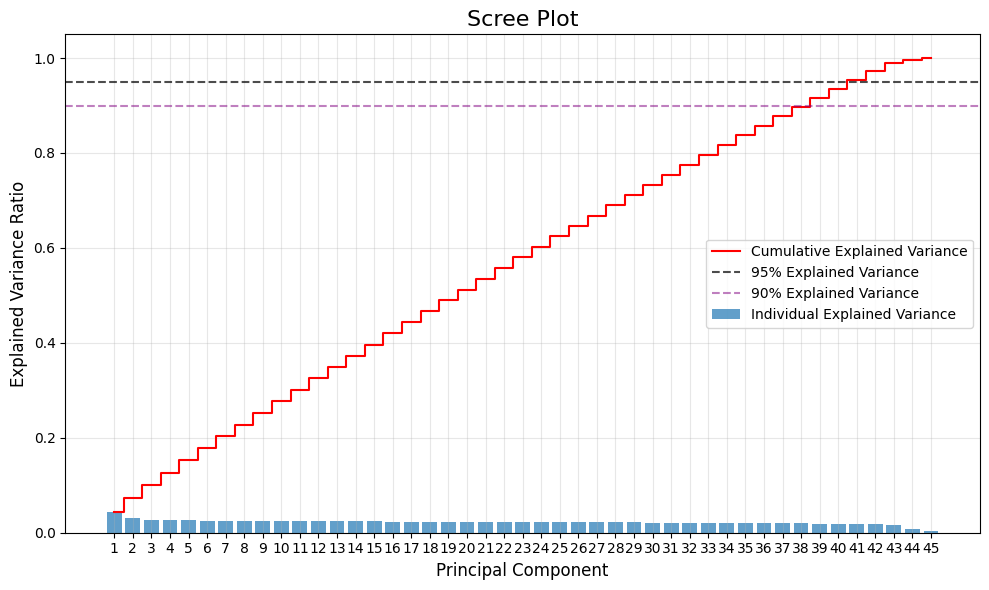

In [85]:
# pca_scree_plot function is already run above 

pca_scree_plot(df_prediction, n_components=45)

# Running the xgboost for Prediction dataset

In [ ]:
# Training the xgboost Regression model on the prediction dataset
import xgboost 
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, n_estimators = 100, random_state = 0, max_depth = 30)
xgbr.fit(df, df_lbl)

In [86]:
y_pred1_prediction = xgbr.predict(df_prediction)

In [87]:
y_pred1_prediction = pd.DataFrame(y_pred1_prediction)

In [94]:
pred_farm = pd.read_excel("D:\\LTFS\\PC_Prediction.xlsx")
pred_farm = pd.DataFrame(pred_farm)
pred_farm

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Type of water bodies in hectares 2020,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm)
0,576972022499073,KARNATAKA,SOUTH,M,TUMAKURU,572102,TUMKUR,Tumkur,M,"13.3173175,77.1240408",...,['water'],EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,92.35,23.34,0.97,34.633257,53.384919,Good,0.000118,8.85
1,979235081831136,HARYANA,NORTH,M,KALKA,133302,PANCHKULA,Kalka,M,"30.4749107,77.1320795",...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
2,176490610549774,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,NaN,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
3,977021407171384,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,S,NaN,...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
4,1334154133262320,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,"30.7982131,76.9209035",...,[None],NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,935545821159359,TELANGANA,SOUTH,M,MANCHERIAL,504208,MANCHERIAL,Mancherial,M,NaN,...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,71.85,23.66,0.89,27.145613,41.250114,Average,30.463177,0.00
9996,883027290071704,TELANGANA,SOUTH,M,TEEGALPAHAD,504303,MANCHERIAL,Mancherial,M,"19.0210779,79.6371575",...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,71.85,23.66,0.89,27.145613,41.250114,Average,30.463177,0.00
9997,445611949107371,MADHYA PRADESH,CENTRAL,M,NARWAR,473865,SHIVPURI,Datla,M,"25.6783041,78.0419912",...,[None],DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,75.76,19.12,0.89,22.996538,34.525942,Poor,35.600829,2.93
9998,731338063265357,ANDHRA PRADESH,SOUTH,M,PULLALACHERUVU,523328,PRAKASAM,Pullalacheruvu,M,NaN,...,[None],DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,72.70,14.91,0.78,14.216240,20.296205,Poor,55.097853,1.79


In [96]:
pred_farm1 = pred_farm.iloc[:, 0]
pred_farm1 = pd.DataFrame(pred_farm1)
pred_farm1


,FarmerID
0,576972022499073
1,979235081831136
2,176490610549774
3,977021407171384
4,1334154133262320
...,...
9995,935545821159359
9996,883027290071704
9997,445611949107371
9998,731338063265357


In [97]:
df_prediction_concat = pd.concat([pred_farm1, y_pred1_prediction], axis=1)
print(df_prediction_concat)
df_prediction_concat.to_excel('D:\\LTFS\\Submission_Format\\Farmer_Income_Prediction_LTF_Challenge.xlsx')

              FarmerID             0
0      576972022499073  1.390545e+06
1      979235081831136  8.403943e+05
2      176490610549774  8.924401e+05
3      977021407171384  1.261404e+06
4     1334154133262320  1.103708e+06
...                ...           ...
9995   935545821159359  7.176838e+05
9996   883027290071704  7.684717e+05
9997   445611949107371  1.557744e+06
9998   731338063265357  7.539582e+05
9999  1013348112754110  7.432899e+05

[10000 rows x 2 columns]
